In [4]:
import os
import numpy as np
import scipy as sp
import scipy.fftpack
import scipy.io.wavfile
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from utils import *
%matplotlib inline
set_matplotlib_formats('png')
plt.rcParams['figure.figsize']=[10,5]

In [5]:
# CONFIGURATION
set_save_figures(True)

# Input Signal

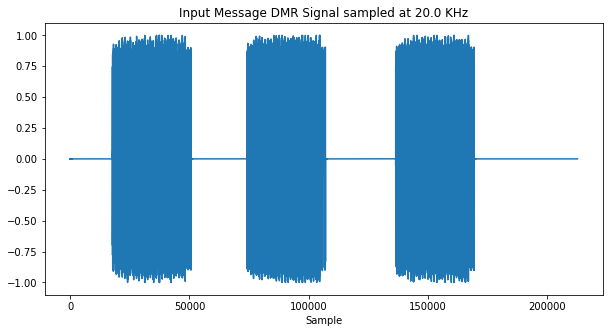

In [7]:
# Read message signal 
fs, dmr= sp.io.wavfile.read(get_data_file_path('cml_1khz_tone.wav'))
dmr_complex = np.zeros(len(dmr), dtype=complex)
dmr_complex.real, dmr_complex.imag = int16_samples_to_float32(dmr[:,0]),int16_samples_to_float32(dmr[:,1])
plt.clf()
plt.plot(dmr_complex);
plt.title(f'Input Message DMR Signal sampled at {fs/1000} KHz');
plt.xlabel('Sample');
save_figure('input-signal')

The input signal shown above, is a DMR signal sampled at `20 KHz` that consists of 3 shorts bursts of a 1 KHz test tone that is modulated inot a DMR signal.  If we zoom in on one of the bursts we can see the Time Division Multiple Access indicative of DMR Signals:

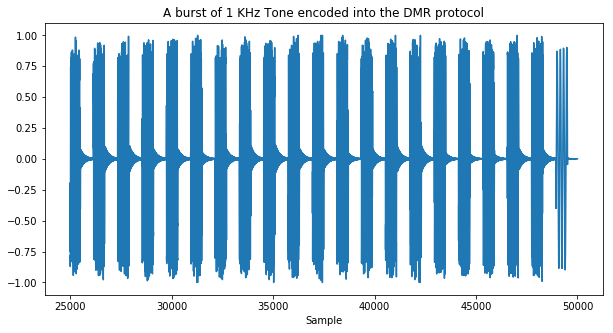

In [8]:
plt.clf()
signal_start,signal_end =25000,50000;
plt.plot(np.arange(signal_start,signal_end),dmr_complex[signal_start:signal_end]);
plt.title('A burst of 1 KHz Tone encoded into the DMR protocol')
plt.xlabel('Sample');

If we isolate one of the TDMA time slots out of this particular transmission we can see the take a look at the spectrum of an active timeslot.

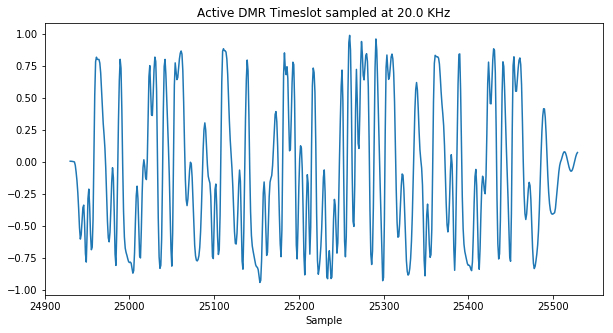

In [9]:
plt.clf()
time_slot_duration=0.030 # 30 ms
timeslot_samples=int(time_slot_duration*fs);
timeslot_start=24930;
timeslot_end=timeslot_start+timeslot_samples;
dmr_timeslot = dmr_complex[timeslot_start:timeslot_end];
plt.plot(np.arange(timeslot_start,timeslot_end),dmr_timeslot);
plt.title(f'Active DMR Timeslot sampled at {fs/1000} KHz');
plt.xlabel('Sample');

Plotting the spectrum of this signal:

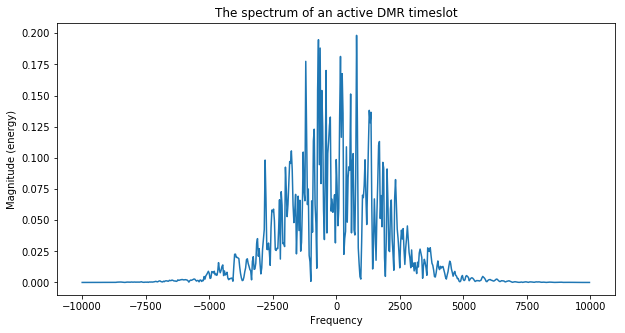

In [10]:
plt.clf()
plt.magnitude_spectrum(dmr_timeslot,fs);
plt.title('The spectrum of an active DMR timeslot');

We can see from the figure above that the bandwidth of our input signal is about what we'd expect at around `12.5 KHz`

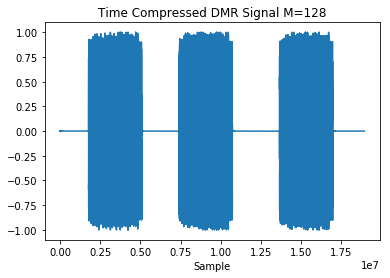

In [7]:
m=128
tc_sig=np.fromfile(f'../../results/cml_1kz_tone_tcola_m={m}.dat', dtype=np.csingle);
plt.clf()
plt.plot(tc_sig)
plt.title(f'Time Compressed DMR Signal M={m}');
plt.xlabel('Sample');

Again we will pull out one the bursts to look at it closer.

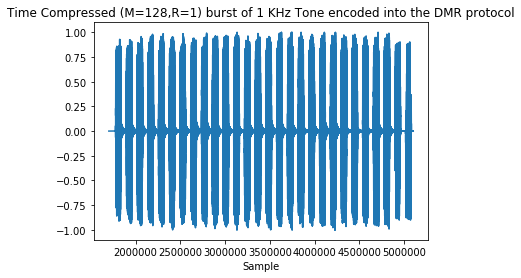

In [8]:
tc_burst_range = np.arange(1700000,5100000);
tc_burst=tc_sig[tc_burst_range];
plt.clf()
plt.plot(tc_burst_range,tc_burst);
plt.title('Time Compressed (M=128,R=1) burst of 1 KHz Tone encoded into the DMR protocol')
plt.xlabel('Sample');

One thing that you will notice that this signal looks very similar to the one shown above, with the difference that the number of samples used to represent the signal is much larger (`fs*M/R`)

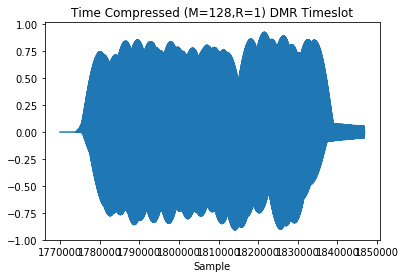

In [9]:
tc_timeslot_start = 1770000;
tc_timeslot_end = tc_timeslot_start+timeslot_samples*m;
tc_timeslot_range = np.arange(tc_timeslot_start,tc_timeslot_end);
tc_timeslot = tc_sig[tc_timeslot_range];
plt.clf()
plt.plot(tc_timeslot_range,tc_timeslot);
plt.title('Time Compressed (M=128,R=1) DMR Timeslot')
plt.xlabel('Sample');

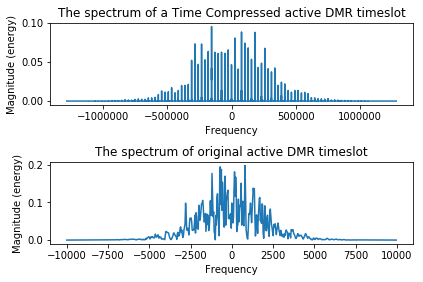

In [10]:
plt.clf()
plt.subplot(2,1,1)
plt.magnitude_spectrum(tc_timeslot,fs*m);
plt.title('The spectrum of a Time Compressed active DMR timeslot');
plt.subplot(2,1,2);
plt.magnitude_spectrum(dmr_timeslot,fs);
plt.title('The spectrum of original active DMR timeslot');
plt.tight_layout(1.0)